# Sentinent Analysis 

## Vader

In [2]:
import os
import re
import pandas as pd
import numpy as np
from collections import defaultdict

# Set Pandas to display all rows of dataframes
pd.set_option('display.max_rows', 500)

# nltk
from nltk import tokenize

#Vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Plotting tools
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tqdm import tqdm_notebook as tqdm
from tqdm import trange

In [3]:
dr =  "/home/boris/Documents/Semestre 2/Atelier/"

In [4]:
title = "All Quiet on the Western Front"

In [5]:
def import_text (path, book_name, chapters):
    txt_files = dict()
    for i in range(1, chapters+1):
        txt_files['Chapter ' + str(i)] = dict()
        
    chapter_paths_list = []
    for i in range (1, chapters+1):
        chapter_paths_list.append(dr+book_name+'/Chapter '+str(i))
        
    files_paths = []
    for path in chapter_paths_list:
        scenes = []
        files = sorted(os.listdir(path))
        for f in files:
            scenes.append(path+'/'+f)
        files_paths.append(scenes)  
        
    for chap in range (0, len(files_paths)):
        for scene in range (0, len(files_paths[chap])):
            f  = open(files_paths[chap][scene], 'r')
            txt_files['Chapter '+str(chap + 1)]['Scene '+str(scene + 1)] = f.read()
    
    return(txt_files)

In [6]:
book = import_text(dr, title, 12)

In [7]:
book['Chapter 12']['Scene 1']

' It is autumn. There are not many of the old hands left. I am the last of the seven fellows from our class.\n Everyone talks of peace and armistice. All wait. If it again proves an illusion, then they will break up; hope is high, it cannot be taken away again without an upheaval. If there is not peace, then there will be revolution.\n I have fourteen days rest, because I have swallowed a bit of gas; in the little garden I sit the whole day long in the sun. The armistice is coming soon, I believe it now too. Then we will go home.\n Here my thoughts stop and will not go any farther. All that meets me, all that floods over me are but feelings, greed of life, love of home, yearning for the blood, intoxication of deliverance. But no aims.\n Had we returned home in 1916, out of the suffering and the strength of our experiences we might have unleashed a storm. Now if we go back we will be weary, broken, burnt out, rootless, and without hope. We will not be able to find our way any more.\n An

In [8]:
analyzer = SentimentIntensityAnalyzer()

In [9]:
def sentiment_analysis (txt_files):
    for ch in txt_files.keys():
        for s in txt_files[ch].keys():
            text  = txt_files[ch][s].replace('\n', '')
            sentence_list = tokenize.sent_tokenize(text)
            sentiments = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
            for sentence in sentence_list:
                vs = analyzer.polarity_scores(sentence)
                sentiments['compound'] += vs['compound']
                sentiments['neg'] += vs['neg']
                sentiments['neu'] += vs['neu']
                sentiments['pos'] += vs['pos']
        
            sentiments['compound'] = sentiments['compound'] / len(sentence_list)
            sentiments['neg'] = sentiments['neg'] / len(sentence_list)
            sentiments['neu'] = sentiments['neu'] / len(sentence_list)
            sentiments['pos'] = sentiments['pos'] / len(sentence_list)
    
            txt_files[ch][s] = (txt_files[ch][s][0], txt_files[ch][s][1], sentiments) 
    return(txt_files)

In [10]:
book = sentiment_analysis (book)

In [11]:
compound_sentiments = [book[ch][s][2]['compound'] for ch in book for s in book[ch]]

In [12]:
s = 0
for chapter in book :
    print (chapter)
    for scene in book[chapter]:
        print('  Scene', str(s))
        print('    ',round(compound_sentiments[s], 3))
        s += 1
    print('')

Chapter 1
  Scene 0
     0.047
  Scene 1
     0.204
  Scene 2
     0.037
  Scene 3
     0.007

Chapter 2
  Scene 4
     -0.099
  Scene 5
     0.024
  Scene 6
     0.057
  Scene 7
     -0.077
  Scene 8
     -0.003

Chapter 3
  Scene 9
     0.094
  Scene 10
     0.033
  Scene 11
     0.027
  Scene 12
     0.068

Chapter 4
  Scene 13
     0.035
  Scene 14
     -0.016
  Scene 15
     0.006
  Scene 16
     -0.008
  Scene 17
     -0.029
  Scene 18
     -0.133
  Scene 19
     -0.047
  Scene 20
     -0.036
  Scene 21
     -0.098

Chapter 5
  Scene 22
     0.044
  Scene 23
     0.088
  Scene 24
     0.003
  Scene 25
     -0.025
  Scene 26
     0.009
  Scene 27
     0.01

Chapter 6
  Scene 28
     -0.044
  Scene 29
     0.158
  Scene 30
     -0.066
  Scene 31
     -0.058
  Scene 32
     -0.102
  Scene 33
     -0.146
  Scene 34
     -0.187
  Scene 35
     -0.033
  Scene 36
     -0.08
  Scene 37
     -0.139
  Scene 38
     0.028
  Scene 39
     -0.209
  Scene 40
     -0.055
  Scene 41
     -0.242


In [13]:
chapter_indices = {}
idx = 0
for chapter in book:
    start = idx
    for scene in book[chapter]:
        idx +=1
    chapter_indices[chapter] = (start, idx)

In [15]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

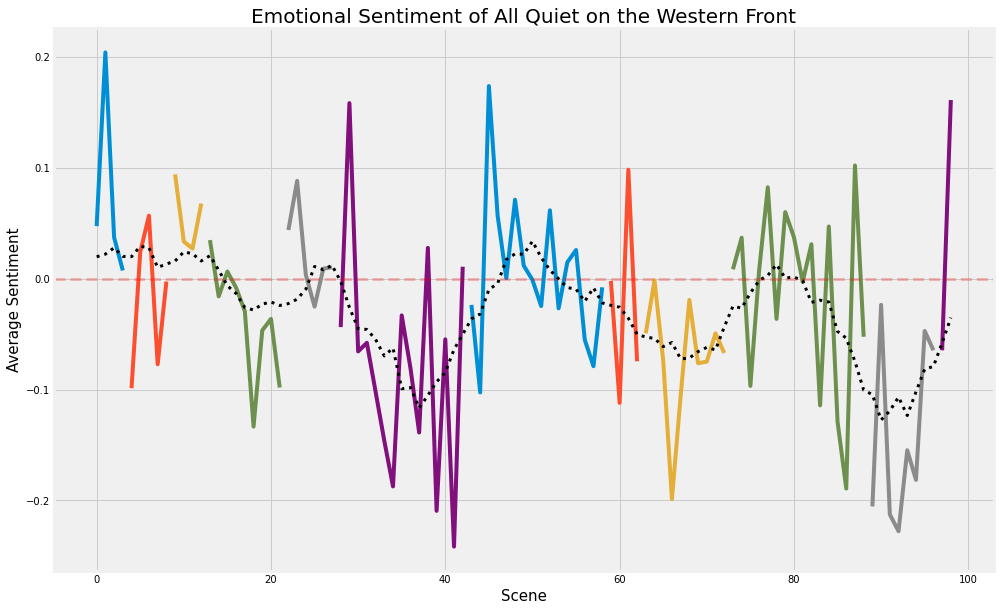

In [16]:
length = sum([len(book[chapter]) for chapter in book])
x = np.linspace(0, length - 1, num=length)
y = [book[chapter][scene][2]['compound'] for chapter in book for scene in book[chapter]]

plt.figure(figsize=(15, 10))
for chapter in chapter_indices:
    plt.plot(x[chapter_indices[chapter][0]: chapter_indices[chapter][1]],
             y[chapter_indices[chapter][0]: chapter_indices[chapter][1]],
             label=chapter)
plt.plot(movingaverage(y, 10), color='k', linewidth=3, linestyle=':', label = 'Moving Average')
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=3)
plt.title('Emotional Sentiment of All Quiet on the Western Front', fontsize=20)
plt.xlabel('Scene', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.show()

In [17]:
sentiment_scores = [[book[chapter][scene][2][sentiment] for chapter in book for scene in book[chapter]]
                    for sentiment in ['compound', 'neg', 'neu', 'pos']]

In [28]:
compound_sentiment = sentiment_scores[0]
print('Average Chapter Sentiment:')
print()
for chapter in chapter_indices:
    compound = compound_sentiment[chapter_indices[chapter][0]: chapter_indices[chapter][1]]
    print('{:45}{:.2f}%'.format(chapter, 100 * sum(compound) / len(compound)))
print('{:45}{:.2f}%'.format('Across the entire series', 100 * sum(compound_sentiment) / len(compound_sentiment)))

Average Chapter Sentiment:

Chapter 1                                    7.41%
Chapter 2                                    -1.95%
Chapter 3                                    5.56%
Chapter 4                                    -3.63%
Chapter 5                                    2.16%
Chapter 6                                    -7.76%
Chapter 7                                    0.60%
Chapter 8                                    -2.26%
Chapter 9                                    -7.16%
Chapter 10                                   -1.30%
Chapter 11                                   -13.97%
Chapter 12                                   4.83%
Across the entire series                     -2.91%


## NRC emotion lexicon

In [29]:
import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [30]:
def text_emotion(df, column):
    '''
    Takes a DataFrame and a specified column of text and adds 10 columns to the
    DataFrame for each of the 10 emotions in the NRC Emotion Lexicon, with each
    column containing the value of the text in that emotions
    INPUT: DataFrame, string
    OUTPUT: the original DataFrame with ten new columns
    '''

    new_df = df.copy()

    filepath = ('/home/boris/Bureau/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt')
    emolex_df = pd.read_csv(filepath,
                            names=["word", "emotion", "association"],
                            sep='\t')
    emolex_words = emolex_df.pivot(index='word',
                                   columns='emotion',
                                   values='association').reset_index()
    emotions = emolex_words.columns.drop('word')
    emo_df = pd.DataFrame(0, index=df.index, columns=emotions)

    stemmer = SnowballStemmer("english")

    
    chapter = ''
    scene = ''
    
    with tqdm(total=len(list(new_df.iterrows()))) as pbar:
        for i, row in new_df.iterrows():
            pbar.update(1)
            if row['chapter'] != chapter:
                print(row['chapter'])
                chapter = row['chapter']
            if row['scene'] != scene:
                print('   ', row['scene'])
                scene = row['scene']
                sc = row['scene']
            document = word_tokenize(new_df.loc[i][column])
            for word in document:
                word = stemmer.stem(word.lower())
                emo_score = emolex_words[emolex_words.word == word]
                if not emo_score.empty:
                    for emotion in list(emotions):
                        emo_df.at[i, emotion] += emo_score[emotion]

    new_df = pd.concat([new_df, emo_df], axis=1)

    return new_df

In [31]:
book = import_text(dr, title, 12)

In [32]:
data = {'chapter': [], 'scene': [], 'text': []}
for chapter in book:
    print(chapter)
    for scene  in tqdm(book[chapter]):
        sc = scene
        text = book[chapter][scene].replace('\n', '')
        data['chapter'].append(chapter)
        data['scene'].append(sc)
        data['text'].append(text)
        
book_df = pd.DataFrame(data=data)
        

Chapter 1


  0%|          | 0/4 [00:00<?, ?it/s]

Chapter 2


  0%|          | 0/5 [00:00<?, ?it/s]

Chapter 3


  0%|          | 0/4 [00:00<?, ?it/s]

Chapter 4


  0%|          | 0/9 [00:00<?, ?it/s]

Chapter 5


  0%|          | 0/6 [00:00<?, ?it/s]

Chapter 6


  0%|          | 0/15 [00:00<?, ?it/s]

Chapter 7


  0%|          | 0/16 [00:00<?, ?it/s]

Chapter 8


  0%|          | 0/4 [00:00<?, ?it/s]

Chapter 9


  0%|          | 0/10 [00:00<?, ?it/s]

Chapter 10


  0%|          | 0/16 [00:00<?, ?it/s]

Chapter 11


  0%|          | 0/8 [00:00<?, ?it/s]

Chapter 12


  0%|          | 0/2 [00:00<?, ?it/s]

In [33]:
book_df = text_emotion(book_df, 'text')

  0%|          | 0/99 [00:00<?, ?it/s]

Chapter 1
    Scene 1
    Scene 2
    Scene 3
    Scene 4
Chapter 2
    Scene 1
    Scene 2
    Scene 3
    Scene 4
    Scene 5
Chapter 3
    Scene 1
    Scene 2
    Scene 3
    Scene 4
Chapter 4
    Scene 1
    Scene 2
    Scene 3
    Scene 4
    Scene 5
    Scene 6
    Scene 7
    Scene 8
    Scene 9
Chapter 5
    Scene 1
    Scene 2
    Scene 3
    Scene 4
    Scene 5
    Scene 6
Chapter 6
    Scene 1
    Scene 2
    Scene 3
    Scene 4
    Scene 5
    Scene 6
    Scene 7
    Scene 8
    Scene 9
    Scene 10
    Scene 11
    Scene 12
    Scene 13
    Scene 14
    Scene 15
Chapter 7
    Scene 1
    Scene 2
    Scene 3
    Scene 4
    Scene 5
    Scene 6
    Scene 7
    Scene 8
    Scene 9
    Scene 10
    Scene 11
    Scene 12
    Scene 13
    Scene 14
    Scene 15
    Scene 16
Chapter 8
    Scene 1
    Scene 2
    Scene 3
    Scene 4
Chapter 9
    Scene 1
    Scene 2
    Scene 3
    Scene 4
    Scene 5
    Scene 6
    Scene 7
    Scene 8
    Scene 9
    Scene 10
Chapter 10
    Scene

In [34]:
book_df

,chapter,scene,text,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,Chapter 1,Scene 1,We are at rest five miles behind the front. Y...,9,18,9,9,18,35,48,9,10,31
1,Chapter 1,Scene 2,"Today is wonderfully good. The mail has come,...",8,22,3,7,13,13,34,11,7,19
2,Chapter 1,Scene 3,"Kantorek had been our schoolmaster, a stern l...",13,10,9,17,6,29,20,15,6,15
3,Chapter 1,Scene 4,Before going over to see Kemmerich we pack up...,25,38,22,19,22,44,33,18,15,23
4,Chapter 2,Scene 1,It is strange to think that at home in the dr...,3,3,2,3,3,6,8,1,4,3
5,Chapter 2,Scene 2,Though Müller would be delighted to have Kemm...,2,5,0,3,4,8,5,4,3,5
6,Chapter 2,Scene 3,Once it was different. When we went to the di...,3,10,2,1,6,5,18,3,5,13
7,Chapter 2,Scene 4,By threes and fours our class was scattered o...,17,20,13,17,10,31,34,16,11,19
8,Chapter 2,Scene 5,I sit by Kemmerich's bed. He is sinking stead...,20,22,17,15,10,38,46,28,16,18
9,Chapter 3,Scene 1,Reinforcements have arrived. The vacancies ha...,1,6,1,1,3,3,11,1,2,4


In [35]:
book_df['word_count'] = book_df['text'].apply(tokenize.word_tokenize).apply(len)

In [36]:
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 
            'positive', 'sadness', 'surprise', 'trust']

In [37]:
for emotion in emotions:
    book_df[emotion] = book_df[emotion] / book_df['word_count']

In [38]:
book_df.set_index(['chapter', 'scene'], inplace=True)

In [39]:
book_df

text  \
chapter    scene                                                         
Chapter 1  Scene 1    We are at rest five miles behind the front. Y...   
           Scene 2    Today is wonderfully good. The mail has come,...   
           Scene 3    Kantorek had been our schoolmaster, a stern l...   
           Scene 4    Before going over to see Kemmerich we pack up...   
Chapter 2  Scene 1    It is strange to think that at home in the dr...   
           Scene 2    Though Müller would be delighted to have Kemm...   
           Scene 3    Once it was different. When we went to the di...   
           Scene 4    By threes and fours our class was scattered o...   
           Scene 5    I sit by Kemmerich's bed. He is sinking stead...   
Chapter 3  Scene 1    Reinforcements have arrived. The vacancies ha...   
           Scene 2    We couldn't do without Katczinsky; he has a s...   
           Scene 3    We have settled ourselves on the sunny side o...   
           Scene 4    Tjaden has a special grudge against Himmelsto...   
Chapter 4  Scene 1    We have to go up on wiring fatigue. The motor...   
           Scene 2    The air becomes acrid with the smoke of the g...   
           Scene 3    To me the front is a mysterious whirlpool. Th...   
           Scene 4    An indigent looking wood receives us. We pass...   
           Scene 5    At regular intervals we ram in the iron stake...   
           Scene 6    He goes off. Things become quieter, but the c...   
           Scene 7    We go back. It is time we returned to the lor...   
           Scene 8    The shelling has ceased, I turn towards the c...   
           Scene 9    Our losses are less than was to be expected--...   
Chapter 5  Scene 1    Killing each separate louse is a tedious busi...   
           Scene 2    Kropp and Müller are amusing themselves. From...   
           Scene 3    Himmelstoss is a little hesitant, his gait be...   
           Scene 4    Müller hasn't finished yet. He tackles Kropp ...   
           Scene 5    The Orderly Room shows signs of life. Himmels...   
           Scene 6    When we break it up Kat says to me: "What do ...   
Chapter 6  Scene 1    There are rumours of an offensive. We go up t...   
           Scene 2    The front is a cage in which we must await fe...   
           Scene 3    We must look out for our bread. The rats have...   
           Scene 4    We wake up in the middle of the night. The ea...   
           Scene 5    The night is unbearable. We cannot sleep, but...   
           Scene 6    Suddenly the nearer explosions cease. The she...   
           Scene 7    It is nearly noon. The sun blazes hotly, the ...   
           Scene 8    The evening benediction begins. Night comes, ...   
           Scene 9    My hands grow cold and my flesh creeps; and y...   
           Scene 10   The days go by and the incredible hours follo...   
           Scene 11   The nights become quiet and the hunt for copp...   
           Scene 12   Suddenly the shelling begins to pound again. ...   
           Scene 13   In one part of the trench I suddenly run into...   
           Scene 14   Bombardment, barrage, curtain-fire, mines, ga...   
           Scene 15   We have just been relieved. The wheels roll b...   
Chapter 7  Scene 1    They have taken us farther back than usual to...   
           Scene 2    The terror of the front sinks deep down when ...   
           Scene 3    Some time ago there was an army theatre in th...   
           Scene 4    The houses in which we are billeted lie near ...   
           Scene 5    So, after a time we find ourselves reassemble...   
           Scene 6    I am called to the Orderly Room. The Company ...   
           Scene 7    I lie down on many a station platform; I stan...   
           Scene 8    I lean against the wall and grip my helmet an...   
           Scene 9    I go to the district commandant to report mys...   
           Scene 10   It is pleasant to sit quietly somewhere, in t...

In [44]:
length = sum([len(book[chapter]) for chapter in book])
x = np.linspace(0, length - 1, num=length)

def emotion_chart(emotion):
    y = [book_df.loc[chapter].loc[scene][emotion] for chapter in book for scene in book[chapter]]

    plt.figure(figsize=(15, 10))
    for ch in chapter_indices:
        plt.plot(x[chapter_indices[ch][0]: chapter_indices[ch][1]],
                 y[chapter_indices[ch][0]: chapter_indices[ch][1]],
                 label=ch)
    plt.plot(movingaverage(y, 10), color='k', linewidth=3, linestyle=':', label='Moving Average')
    plt.legend(loc='best', fontsize=15, bbox_to_anchor=(1.05, 1))
    plt.title('{} Sentiment of All Quiet on the West Front'.format(emotion.title()), fontsize=20)
    plt.xlabel('Scene', fontsize=15)
    plt.ylabel('Average Sentiment', fontsize=15)
    plt.show()
    

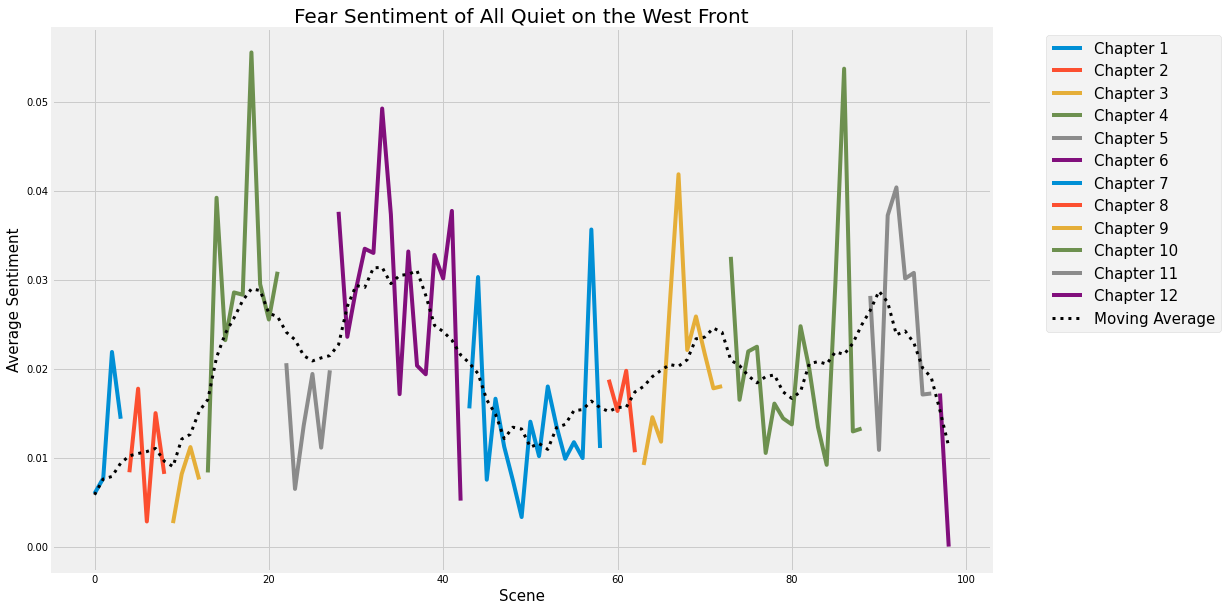

In [47]:
emotion_chart('fear')

In [1]:
emotion_chart('joy')

NameError: name 'emotion_chart' is not defined

In [58]:
x[chapter_indices['Chapter 1'][0]:chapter_indices['Chapter 1'][1] ]

array([0., 1., 2., 3.])

In [65]:
y = [book_df.loc[chapter].loc[scene]['sadness'] for chapter in book for scene in book[chapter]]

In [67]:
y[chapter_indices['Chapter 1'][0]:chapter_indices['Chapter 1'][1] ]

[0.005964214711729622,
 0.012074643249176729,
 0.019305019305019305,
 0.01361573373676248]

In [75]:
emotions

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'negative',
 'positive',
 'sadness',
 'surprise',
 'trust']